In [ ]:
#Import Library
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
import random
import shutil

In [ ]:
# Path untuk direktori dataset
dataset_dir = r"D:\Skripsi\Training CNN\Data 500 V2"

# Path untuk direktori penyimpanan data train, dan validation
output_dir = r"D:\Skripsi\Training CNN\Split_622_DV2"
os.makedirs(output_dir, exist_ok=True)

train_percent = 0.6
val_percent = 0.2
test_percent = 0.2

def split_data(src, train_dst, val_dst, test_dst):
    files = os.listdir(src)
    random.shuffle(files)
    total_count = len(files)
    train_count = int(total_count * train_percent)
    val_count = int(total_count * val_percent)
    test_count = total_count - train_count - val_count

    train_files = files[:train_count]
    val_files = files[train_count:train_count+val_count]
    test_files = files[-test_count:]

    # Membuat direktori jika belum ada
    os.makedirs(train_dst, exist_ok=True)
    os.makedirs(val_dst, exist_ok=True)
    os.makedirs(test_dst, exist_ok=True)

    # Menyalin file ke direktori tujuan dengan memberikan label
    for fname in train_files:
        shutil.copy(os.path.join(src, fname), os.path.join(train_dst, fname))
        labels_train.append(0 if 'normal' in fname else 1)

    for fname in val_files:
        shutil.copy(os.path.join(src, fname), os.path.join(val_dst, fname))
        labels_val.append(0 if 'normal' in fname else 1)

    for fname in test_files:
        shutil.copy(os.path.join(src, fname), os.path.join(test_dst, fname))
        labels_test.append(0 if 'normal' in fname else 1)

# Inisialisasi list untuk menyimpan label
labels_train = []
labels_val = []
labels_test = []

# Memisahkan data untuk setiap kelas
for cls in ['normal', 'abnormal']:
    src_dir = os.path.join(dataset_dir, cls)
    train_dst = os.path.join(output_dir, 'train', cls)
    val_dst = os.path.join(output_dir, 'validation', cls)
    test_dst = os.path.join(output_dir, 'test', cls)
    split_data(src_dir, train_dst, val_dst, test_dst)

print("Pembagian data telah selesai.")

Pembagian data telah selesai.


In [ ]:
def count_images(directory):
    total_images = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".jpg") or file.endswith(".png"):
                total_images += 1
    return total_images

TRAINING_DIR = r"D:\Skripsi\Training CNN\Split_622_DV2\train"
VALIDATION_DIR = r"D:\Skripsi\Training CNN\Split_622_DV2\validation"
TEST_DIR = r"D:\Skripsi\Training CNN\Split_622_DV2\test"

train_image_count = count_images(TRAINING_DIR)
validation_image_count = count_images(VALIDATION_DIR)
test_image_count = count_images(TEST_DIR)

print("Jumlah gambar di direktori training:", train_image_count)
print("Jumlah gambar di direktori validation:", validation_image_count)
print("Jumlah gambar di direktori test:", test_image_count)

Jumlah gambar di direktori training: 300
Jumlah gambar di direktori validation: 100
Jumlah gambar di direktori test: 100


In [ ]:
# Augmentasi data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    #brightness_range=[0.5, 1.5],
    #channel_shift_range=20,
)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_batches = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    seed = 42,
    batch_size =64,
    class_mode='binary',
    color_mode='grayscale'
)

validation_batches = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150, 150),
    seed = 42,
    batch_size = 64,
    class_mode='binary',
    color_mode='grayscale'
)

Found 300 images belonging to 2 classes.


Found 100 images belonging to 2 classes.


In [ ]:
# Build the CNN model
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',padding='valid', input_shape=(150, 150, 1)),
        tf.keras.layers.MaxPool2D((2, 2), padding='valid', strides=(2, 2)),
        tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='valid', activation='relu'),
        tf.keras.layers.MaxPool2D((2, 2), padding='valid', strides=(2, 2)),
        tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='valid', activation='relu'),
        tf.keras.layers.MaxPool2D((2, 2), padding='valid', strides=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'), #kernel_regularizer=regularizers.l2(0.0001)),
        #tf.keras.layers.Dense(64, activation='relu'), #kernel_regularizer=regularizers.l2(0.001)),
        #tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

In [ ]:
model = create_model()
model.summary()

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     9,470,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,563,137 (36.48 MB)

 Trainable params: 9,563,137 (36.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(train_batches, validation_data=validation_batches, batch_size=64, verbose=1, epochs=40)

# Evaluasi model
accuracy = model.evaluate(validation_batches)
print(f'Validation Accuracy: {accuracy[1] * 100:.2f}%')

Epoch 1/40


c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 741ms/step - accuracy: 0.5271 - loss: 0.6955 - val_accuracy: 0.5800 - val_loss: 0.6928
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 406ms/step - accuracy: 0.5615 - loss: 0.6867 - val_accuracy: 0.5100 - val_loss: 0.6864
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 423ms/step - accuracy: 0.5445 - loss: 0.6825 - val_accuracy: 0.6800 - val_loss: 0.6786
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 430ms/step - accuracy: 0.5950 - loss: 0.6765 - val_accuracy: 0.6700 - val_loss: 0.6694
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 447ms/step - accuracy: 0.6361 - loss: 0.6735 - val_accuracy: 0.6600 - val_loss: 0.6576
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 435ms/step - accuracy: 0.6692 - loss: 0.6598 - val_accuracy: 0.7200 - val_loss: 0.6424
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 428ms/step - accuracy: 0.6971 - loss: 0.6452 - val_accuracy: 0.6200 - val_loss: 0.6431
Epoch 8/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 436ms/step - accuracy: 0.6451 - loss: 0.6340 - val_accuracy: 0.6400 - val_loss: 0.6240
Epo

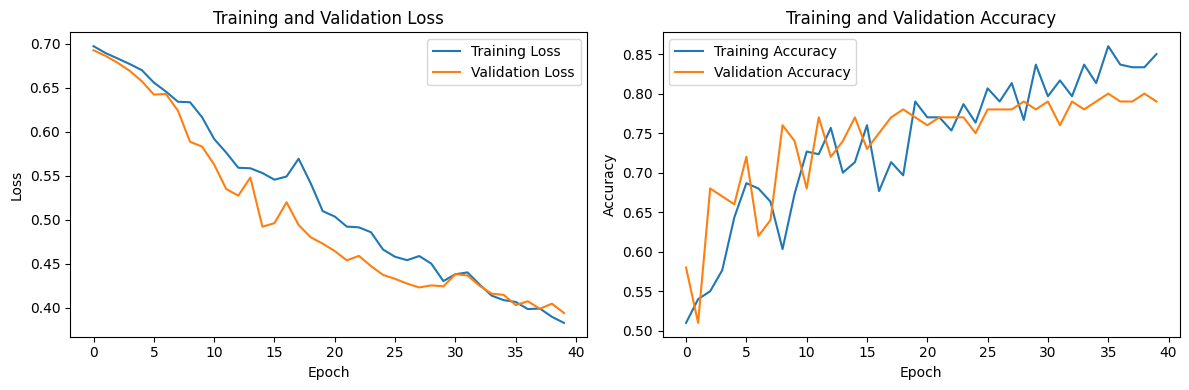

In [ ]:
# Menampilkan grafik loss dan akurasi
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model.save(r"D:\Skripsi\Training CNN\model_622_DV2_S4.h5")

In [ ]:
from keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load trained model
model = load_model(r"D:\Skripsi\Training CNN\model_622_DV2_S4.h5")


# Inisialisasi ImageDataGenerator untuk preprocessing data test
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data test
test_batches = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(150, 150),
    batch_size=1,
    class_mode='binary',
    color_mode='grayscale',
    shuffle=False
)

# Mendapatkan label sebenarnya dari data test
true_labels = test_batches.classes

# Prediksi labels
predicted_labels = model.predict(test_batches)
predicted_labels = (predicted_labels > 0.5).astype(int)

# Evaluasi metrik
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Classification report
class_report = classification_report(true_labels, predicted_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Found 100 images belonging to 2 classes.
  1/100 ━━━━━━━━━━━━━━━━━━━━ 28s 291ms/step

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Accuracy: 0.81
Precision: 0.803921568627451
Recall: 0.82
F1-score: 0.8118811881188119
Confusion Matrix:
 [[40 10]
 [ 9 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81        50
           1       0.80      0.82      0.81        50

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100

